In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# from .evaluation_utils import EvaluationUtils

from evaluation.evaluation_utils import *

In [2]:
no_task_loss_prog_df = pd.read_csv('./loss_progression_no_tasks.csv', index_col=0)
no_task_train_prediction_df = pd.read_csv('./util_lstm_train_no_tasks.csv', index_col=0)
no_task_test_prediction_df = pd.read_csv('./util_lstm_test_no_tasks.csv', index_col=0)

In [3]:
no_task_loss_prog_df.rename(columns={'0': 'loss progress - no tasks'}, inplace=True)
no_task_loss_prog_df.head()

,loss progress - no tasks
0,0.067000
1,0.097104
2,0.096889
3,0.009040
4,0.016942


In [4]:
with_task_loss_prog_df = pd.read_csv('./loss_progression_with_tasks.csv', index_col=0)
with_task_train_prediction_df = pd.read_csv('./util_lstm_train_with_tasks.csv', index_col=0)
with_task_test_prediction_df = pd.read_csv('./util_lstm_test_with_tasks.csv', index_col=0)

In [5]:
with_task_loss_prog_df.rename(columns={'0': 'loss progress - with tasks'}, inplace=True)

In [6]:
cycler = plt.cycler(linestyle=['-', '-', '-', '-.', '--', '-', '--'],
                    color=['black', 'blue', 'green', 'grey', 'green', 'black', 'green'],
)

def plot_df(df: pd.DataFrame, df_columns: list = None, start_range: int = -1, end_range: int = -1, save_plot_path: str = None, y_label: str = ''):  # type: ignore
    if df_columns is None or len(df_columns) == 0:
        df_columns = df.columns.to_list()
    if start_range == -1:
        start_range = 0
    if end_range == -1:
        end_range = len(df)
    fig, ax = plt.subplots()
    
    plt.xlabel('time step', fontsize=45)
    plt.ylabel(y_label, fontsize=45)
    
    ax.set_prop_cycle(cycler)
    plot = df[df_columns].iloc[start_range:end_range].plot.line(figsize=(25, 20), linewidth=4, fontsize=40, ax=ax)
    plt.legend(fontsize=40)
    if save_plot_path is not None:
        plot.figure.savefig(save_plot_path)


In [7]:
comp_loss_prog_df = pd.merge(left=no_task_loss_prog_df, right=with_task_loss_prog_df, left_index=True, right_index=True)

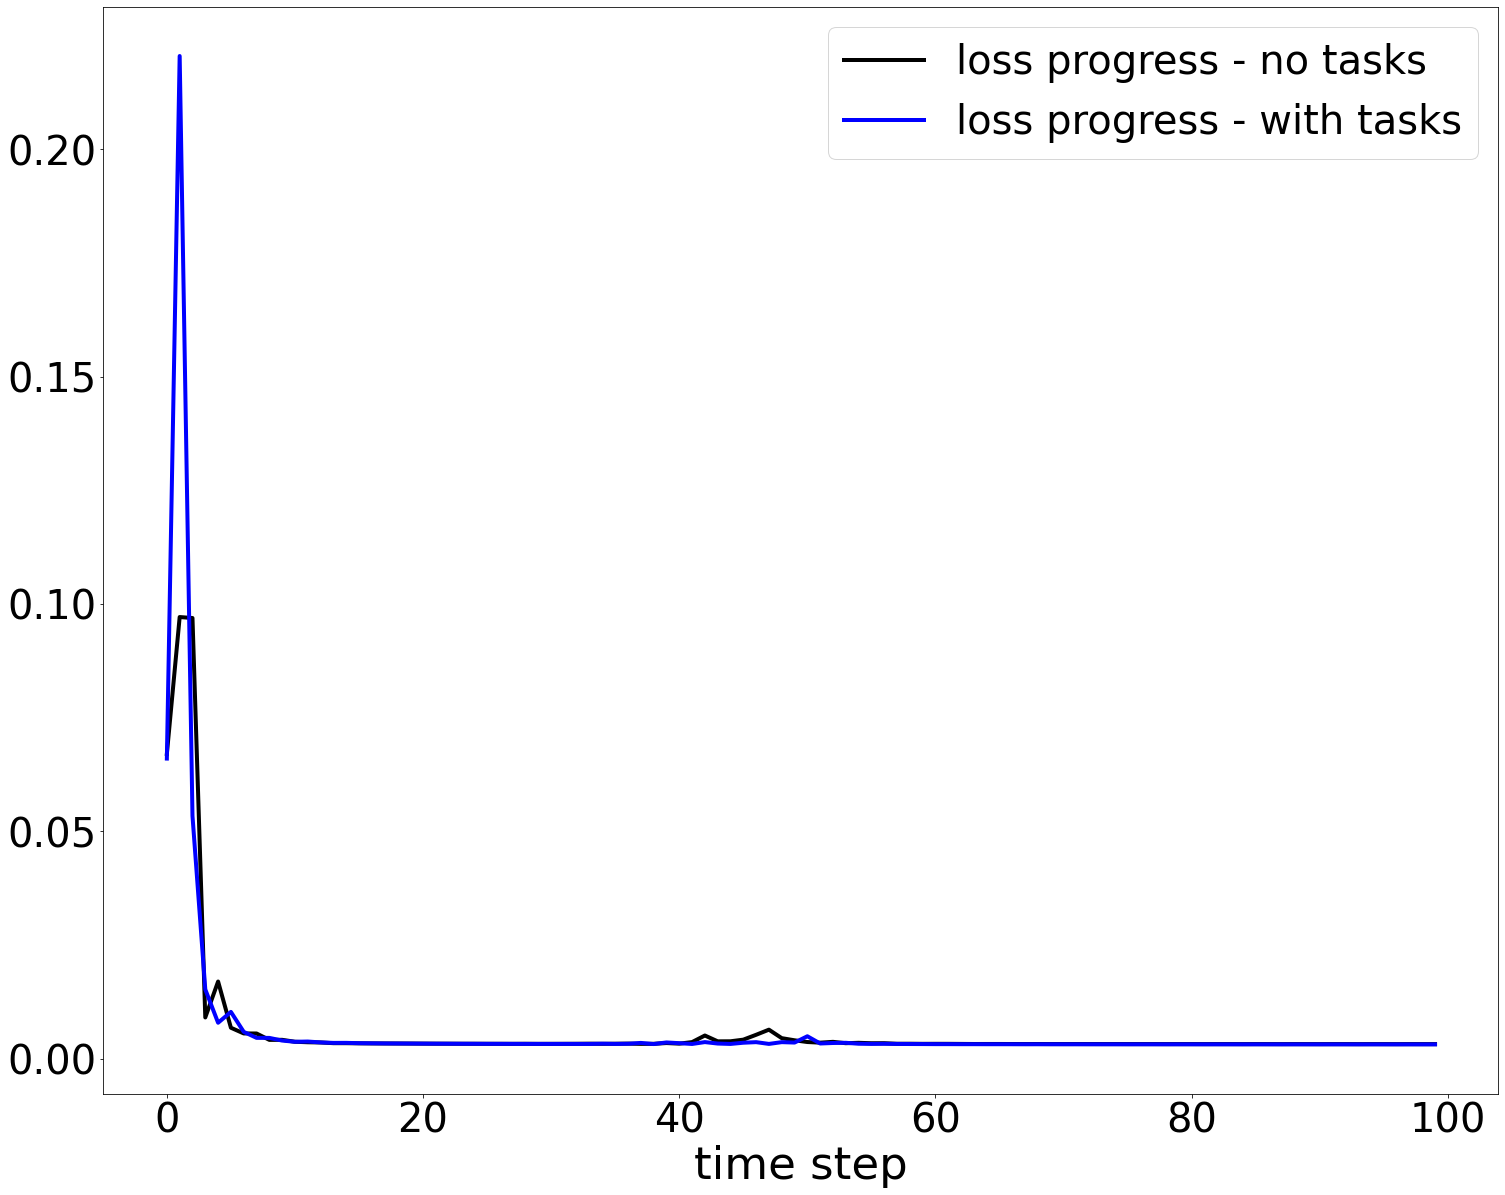

In [8]:
plot_df(comp_loss_prog_df)

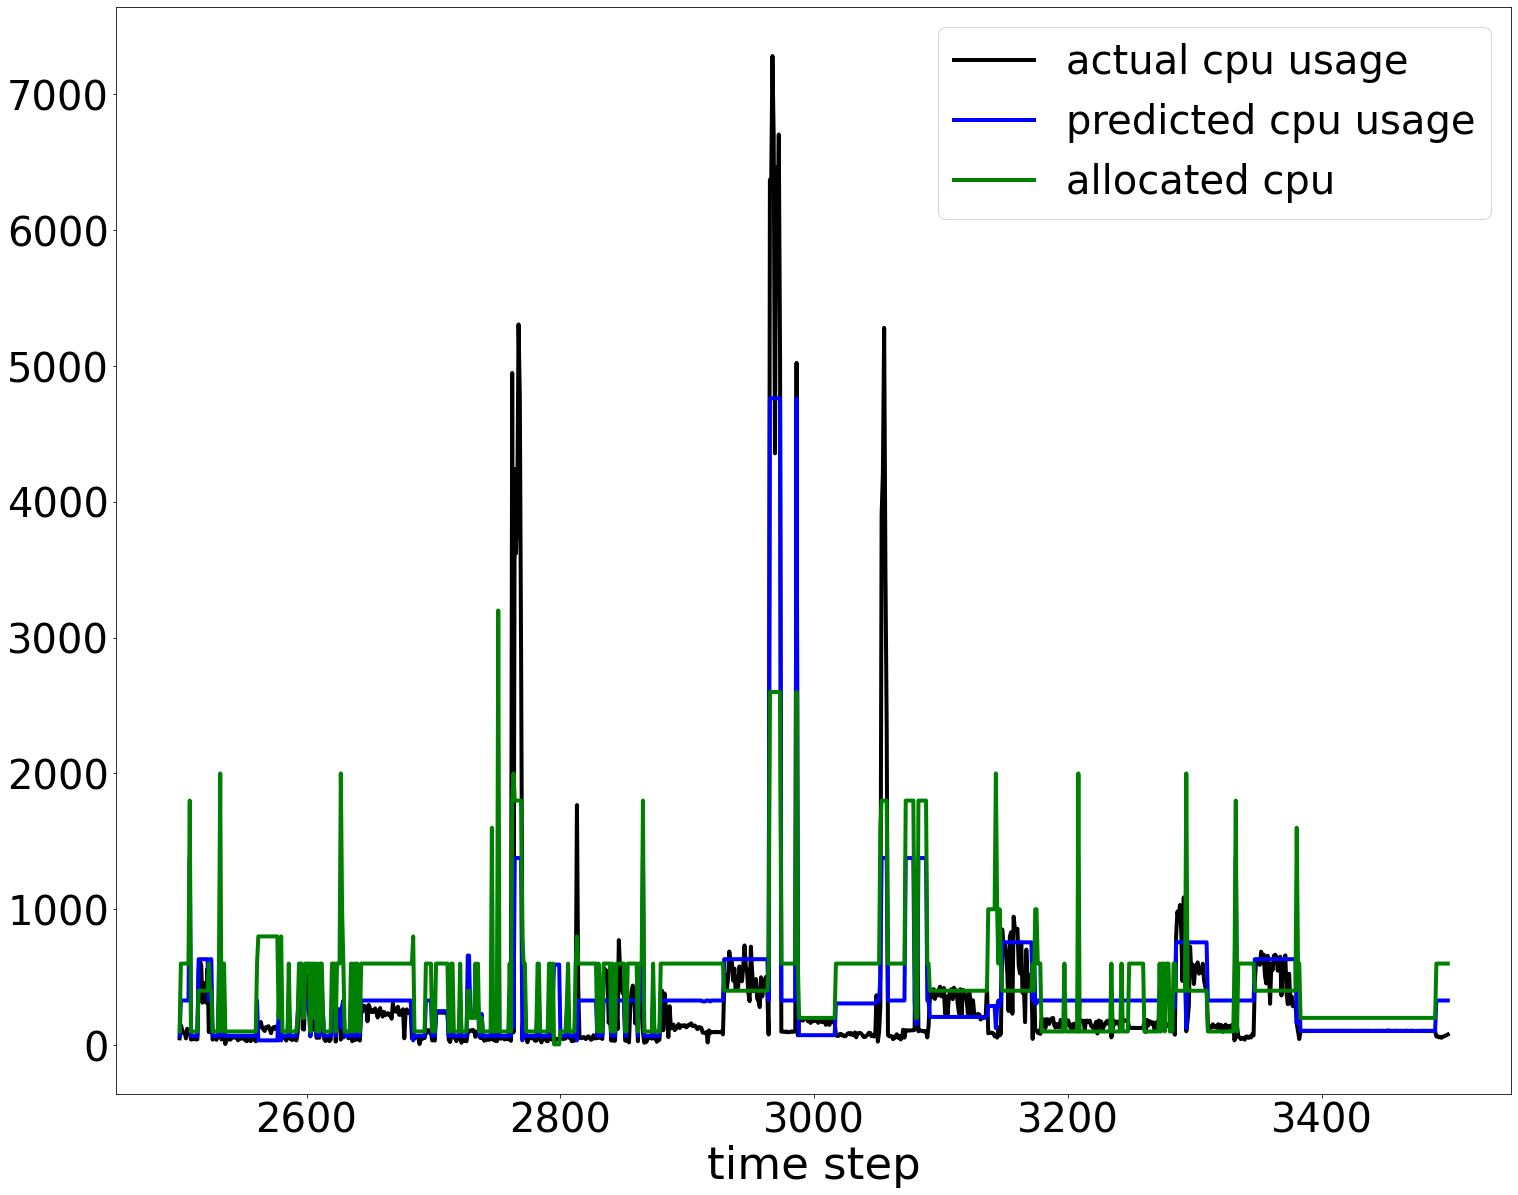

In [9]:
plot_df(no_task_train_prediction_df, df_columns=['actual cpu usage', 'predicted cpu usage', 'allocated cpu'], start_range=2500, end_range=3500)

In [10]:
no_task_train_prediction_df.columns

Index(['actual cpu usage', 'actual mem usage', 'predicted cpu usage',
       'predicted mem usage', 'allocated cpu', 'allocated mem'],
      dtype='object')

In [11]:
compare_df = pd.DataFrame()
common_columns = ['actual cpu usage', 'actual mem usage', 'allocated cpu', 'allocated mem']
compare_df[common_columns] = no_task_train_prediction_df[common_columns]
comparing_columns = ['predicted cpu usage', 'predicted mem usage']
compare_df[list(map('nt '.__add__, comparing_columns))] = no_task_train_prediction_df[comparing_columns]
compare_df[list(map('wt '.__add__, comparing_columns))] = with_task_train_prediction_df[comparing_columns]
# compare_df.plot.line(figsize=(30, 25))

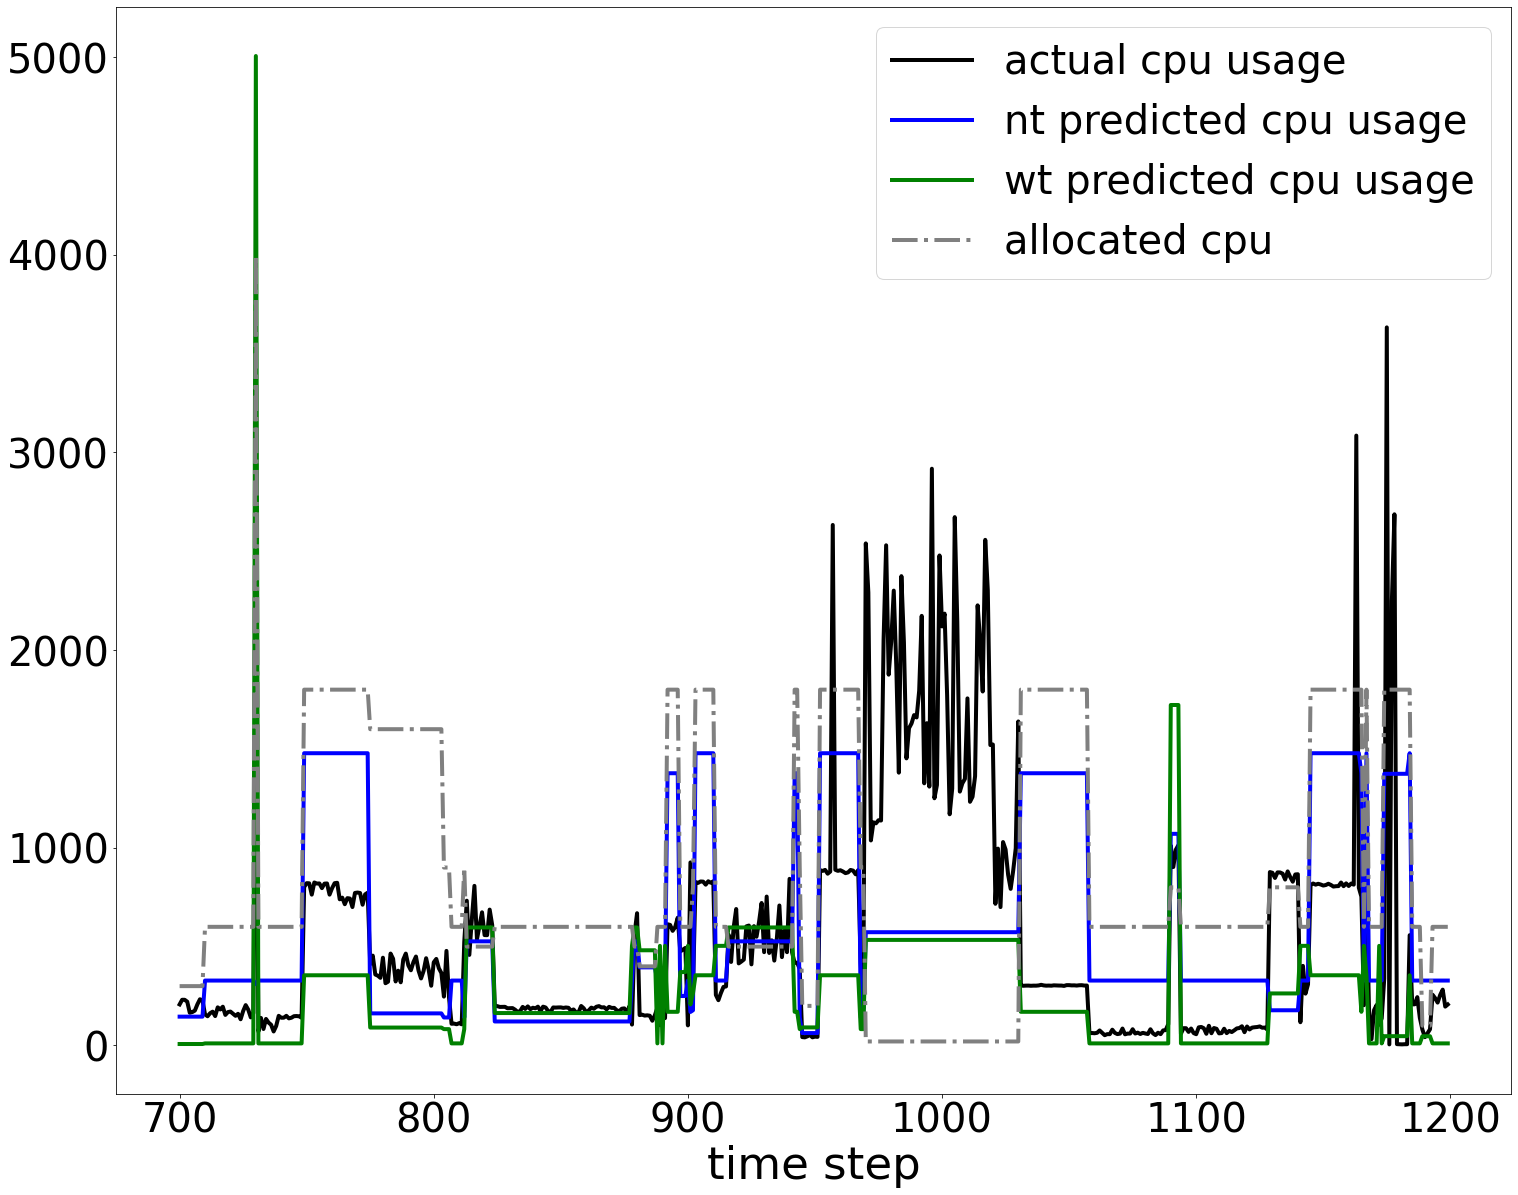

In [12]:
plot_df(compare_df, df_columns=['actual cpu usage', 'nt predicted cpu usage', 'wt predicted cpu usage', 'allocated cpu'], start_range=700, end_range=1200)

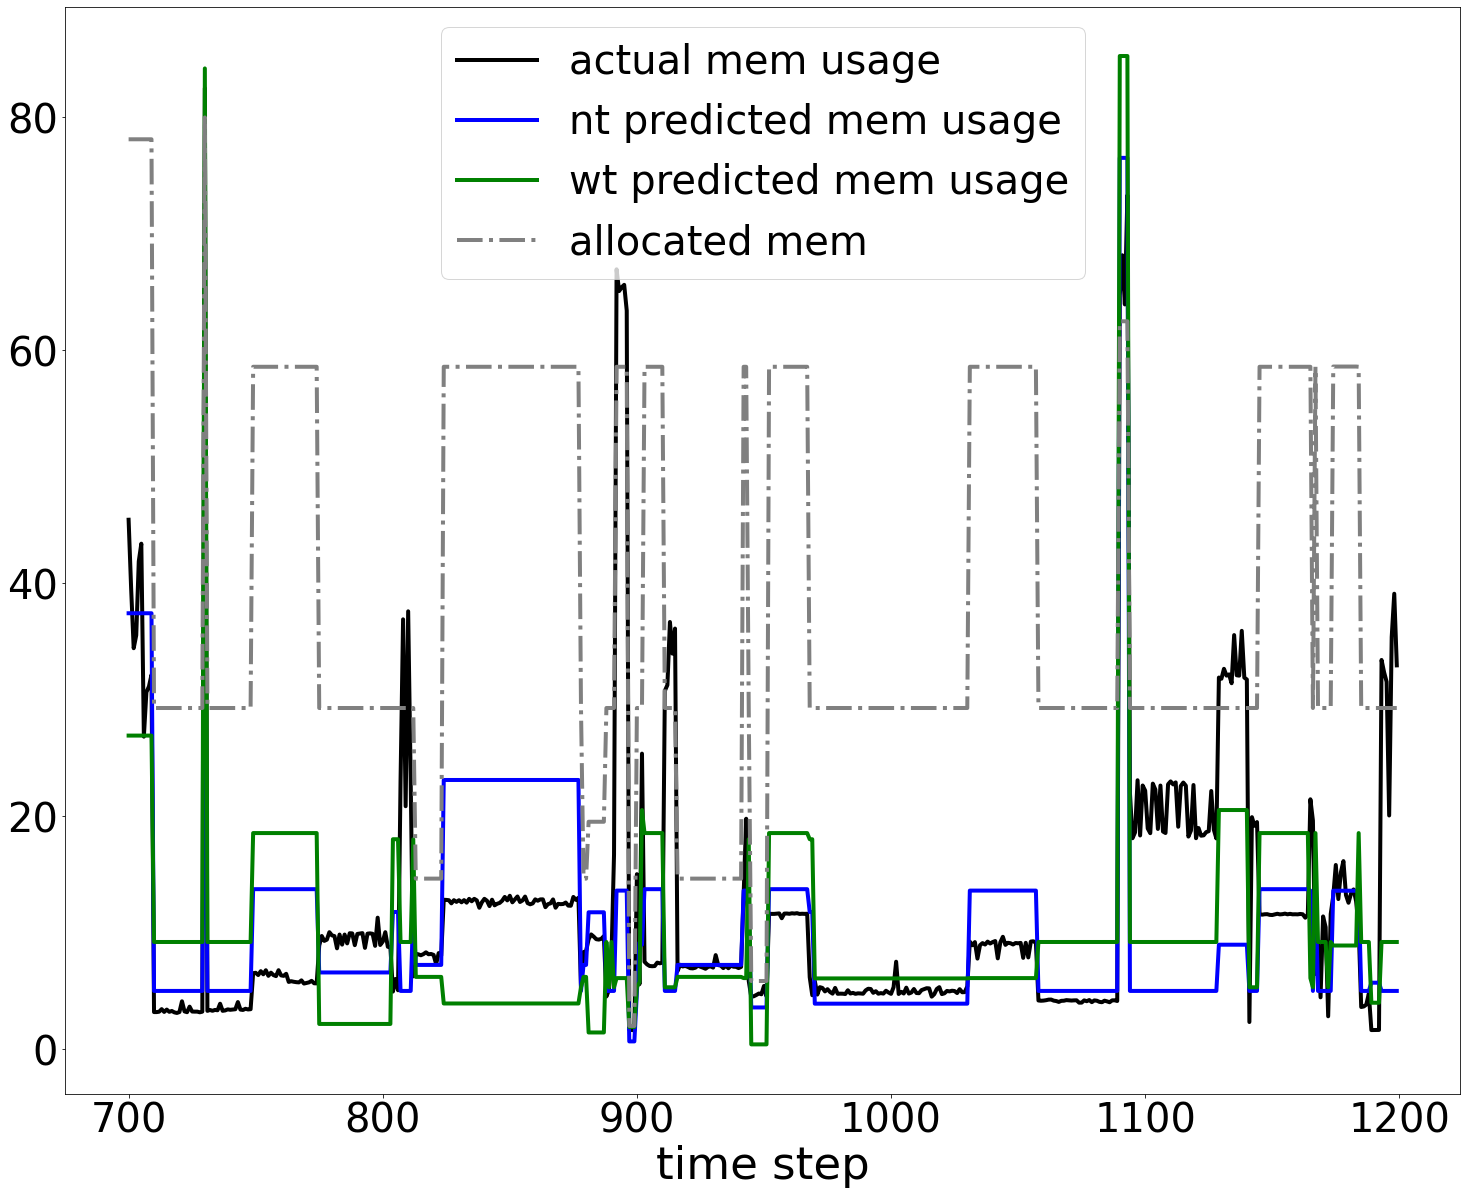

In [13]:
plot_df(compare_df, df_columns=['actual mem usage', 'nt predicted mem usage', 'wt predicted mem usage', 'allocated mem'], start_range=700, end_range=1200)

In [14]:
compare_df.iloc[0]

actual cpu usage          773.050781
actual mem usage           19.953011
allocated cpu             400.000000
allocated mem              10.000002
nt predicted cpu usage    674.911743
nt predicted mem usage      9.447738
wt predicted cpu usage     24.164438
wt predicted mem usage      4.543619
Name: 0, dtype: float64

In [15]:
# test_df = compare_df.iloc[3000:3500, [0, 2, 4, 6]]
test_df = compare_df.iloc[:, [0, 2, 4, 6]]
test_df

,actual cpu usage,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
0,773.050781,400.0,674.911743,24.164438
1,608.671021,600.0,323.875824,227.682938
2,608.102417,600.0,323.875824,227.682938
3,385.129120,600.0,323.875824,227.682938
4,614.094116,600.0,323.875824,227.682938
...,...,...,...,...
9995,255.589432,600.0,328.135406,503.742981
9996,123.900002,600.0,328.135406,10.233524
9997,62.916664,1600.0,162.086319,90.365936
9998,209.150009,50.0,247.156586,844.949890


In [16]:
test_df.iloc[:, 2] / test_df.iloc[:, 0]

0       0.873050
1       0.532103
2       0.532601
3       0.840954
4       0.527404
          ...   
9995    1.283838
9996    2.648389
9997    2.576206
9998    1.181719
9999    1.073770
Length: 10000, dtype: float64

In [17]:
norm_df = pd.DataFrame()
for i in range(1, 4):
    column = test_df.columns[i]
    norm_df[column] = test_df.iloc[:, i] / test_df.iloc[:, 0]


In [18]:
norm_df.head(3)

,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
0,0.517430,0.873050,0.031259
1,0.985754,0.532103,0.374066
2,0.986676,0.532601,0.374415


Source: https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

In [19]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

# TODO

* Make axis description better
* Start at x axis value 1?
* Add a grid?
* What is density and stacked?

In [20]:
norm_df.iloc[:, 1].quantile(0.95)

9.573148226439988

In [21]:
nt = get_over_allocated_series(norm_df, 1, quantile=0.95)
wt = get_over_allocated_series(norm_df, 2, quantile=0.95)

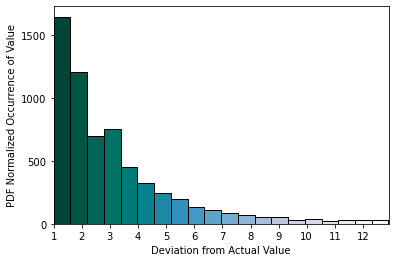

In [22]:
plot_histogram(nt, bin_size=20)

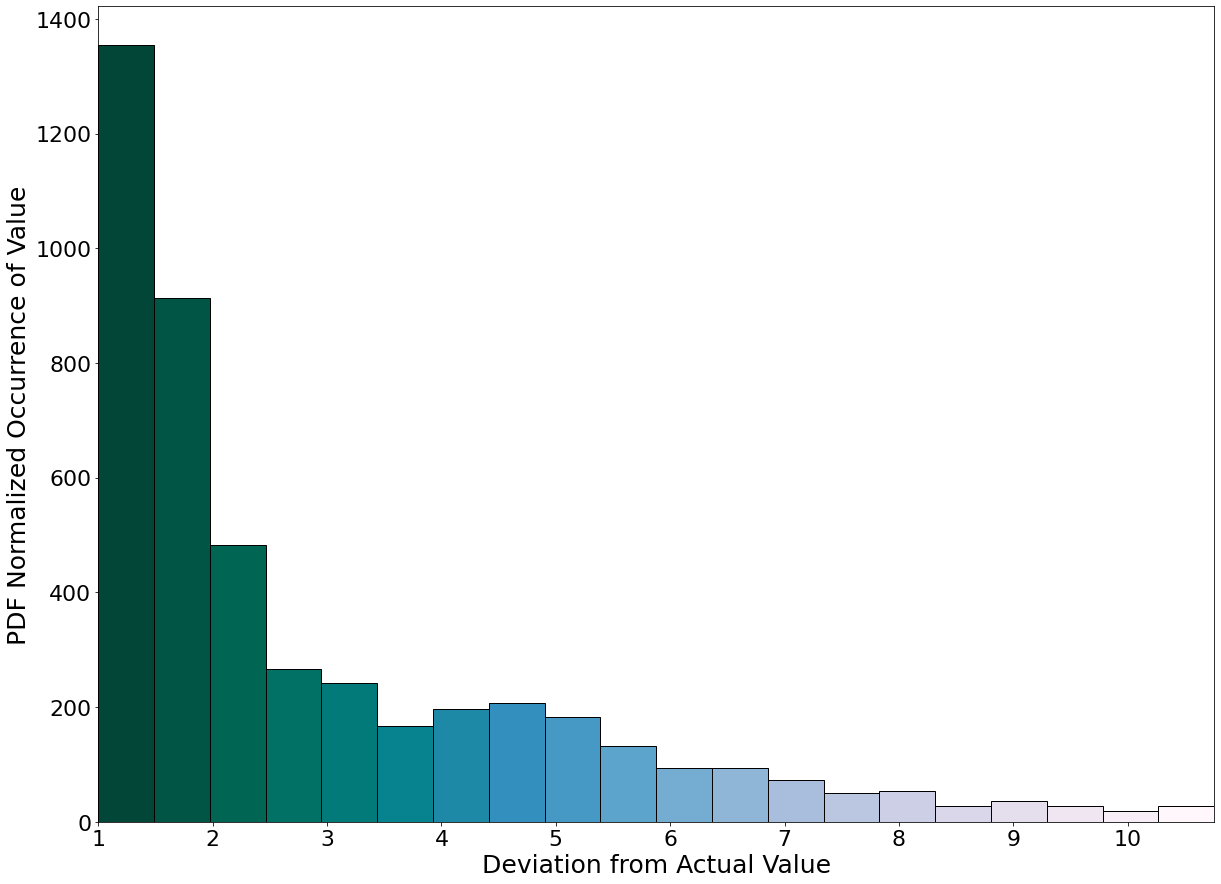

In [23]:
plot_histogram(wt, bin_size=20)

In [24]:
def plot_dataframe_kde(
    data: pd.DataFrame,
    fill: bool = False,
) -> None:
    sns.kdeplot(data=data, fill=fill)

<AxesSubplot:ylabel='Density'>

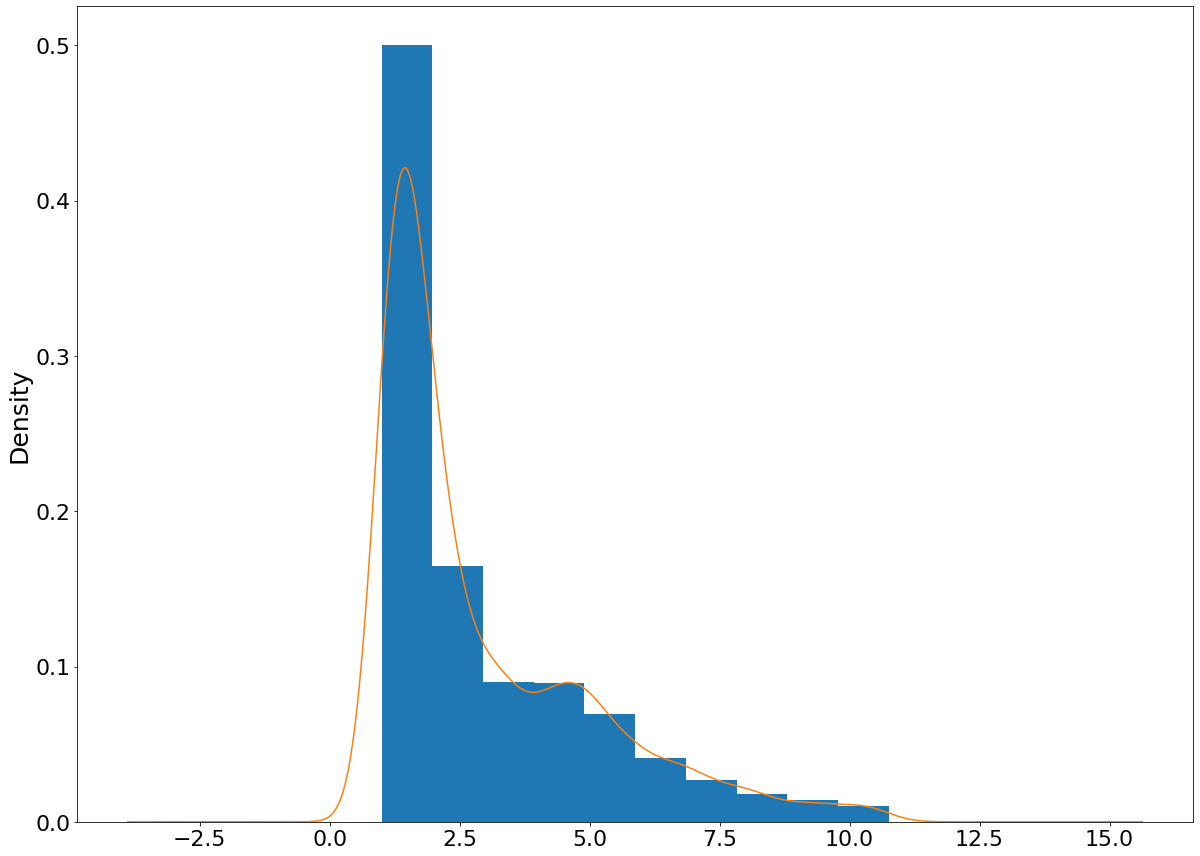

In [25]:
def plot_series_kde(
    data: pd.Series,
    fill: bool = False,
) -> None:
    sns.kdeplot(
        data=data, 
        fill=fill,
        
        cbar=True,
        )
    
ser_test = get_over_allocated_series(norm_df, 2, quantile=0.95)
# plot_series_kde(ser_test, fill=True)
ser_test.plot(kind='hist', density=True)
ser_test.plot(kind='kde')

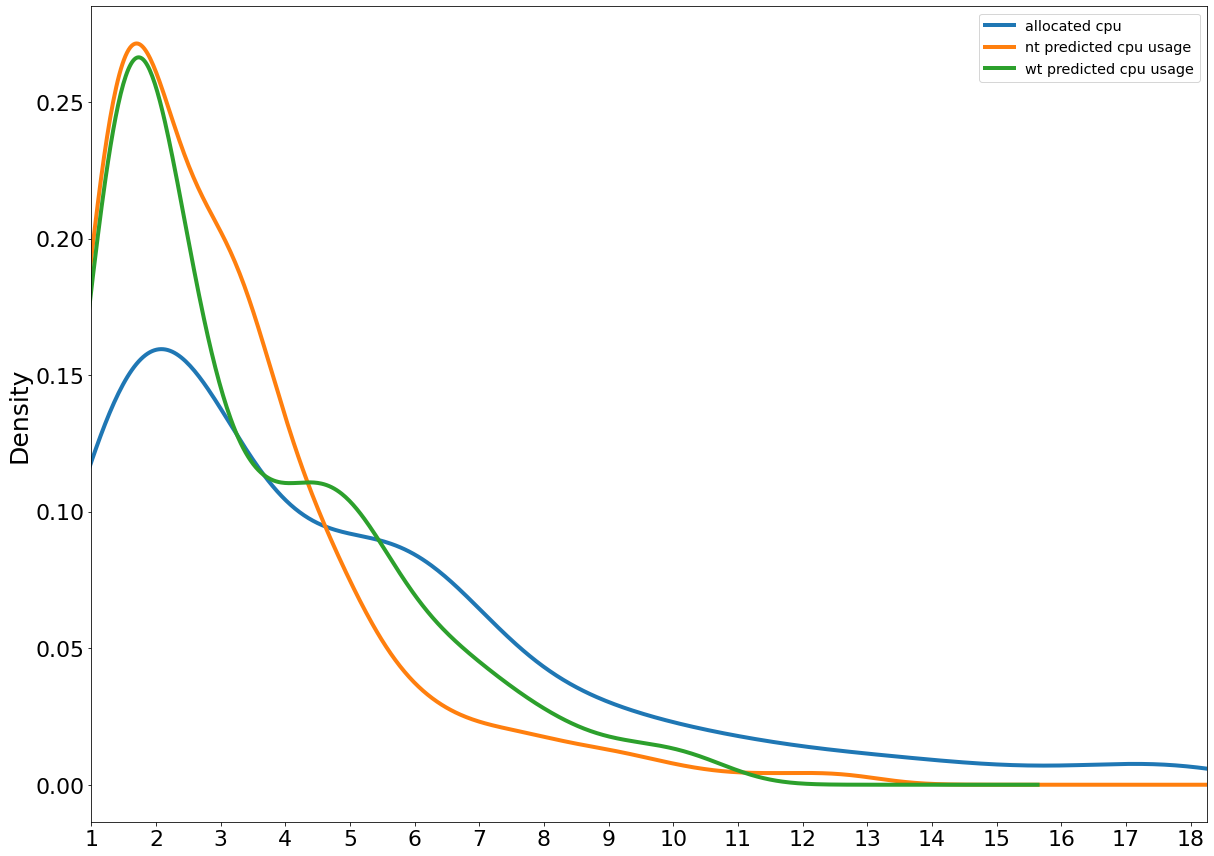

In [26]:
test = get_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95)
# sns.kdeplot(test, fill=False)
# test.plot(kind='hist', density=True, stacked=False)
test.plot.kde(bw_method=0.3, linewidth=4)
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (20, 15),
    'axes.labelsize': 25,
    'axes.titlesize': 25,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
}
plt.rcParams.update(params)
plt.xlim([1, test.max().max()])
plt.xticks(range(1, int(test.max().max() + 1)))
plt.show()
# sns.displot(test)

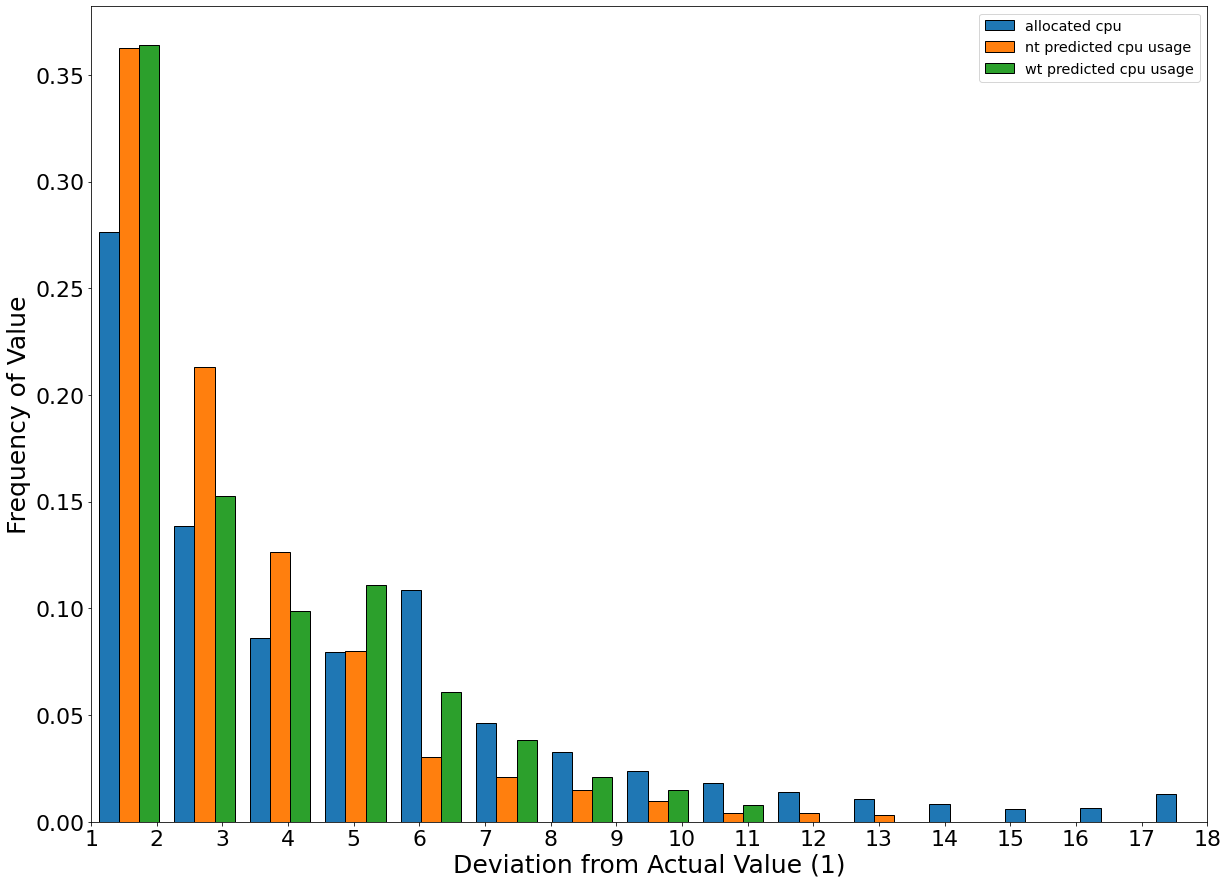

In [48]:
plot_dataframe_histogram(test, bin_size=15, density=True)

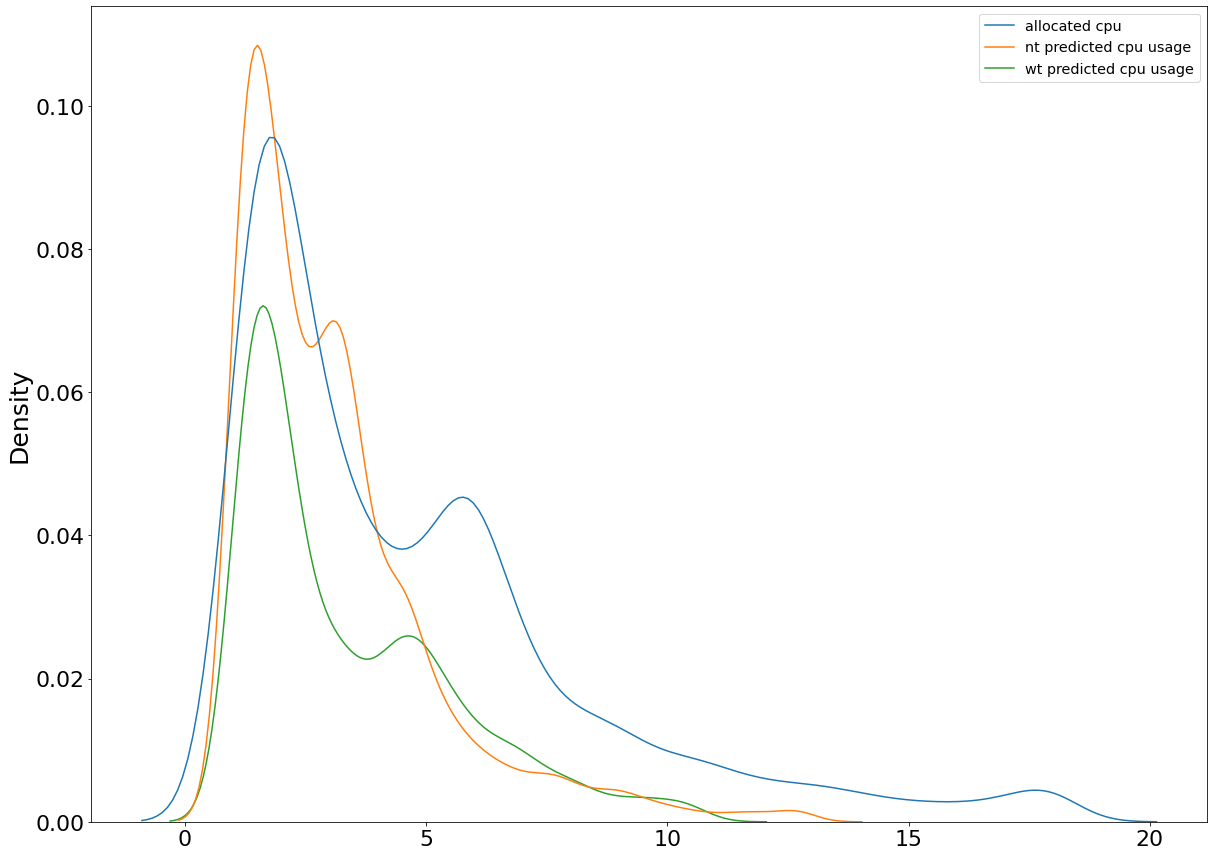

In [28]:
plot_dataframe_kde(test)

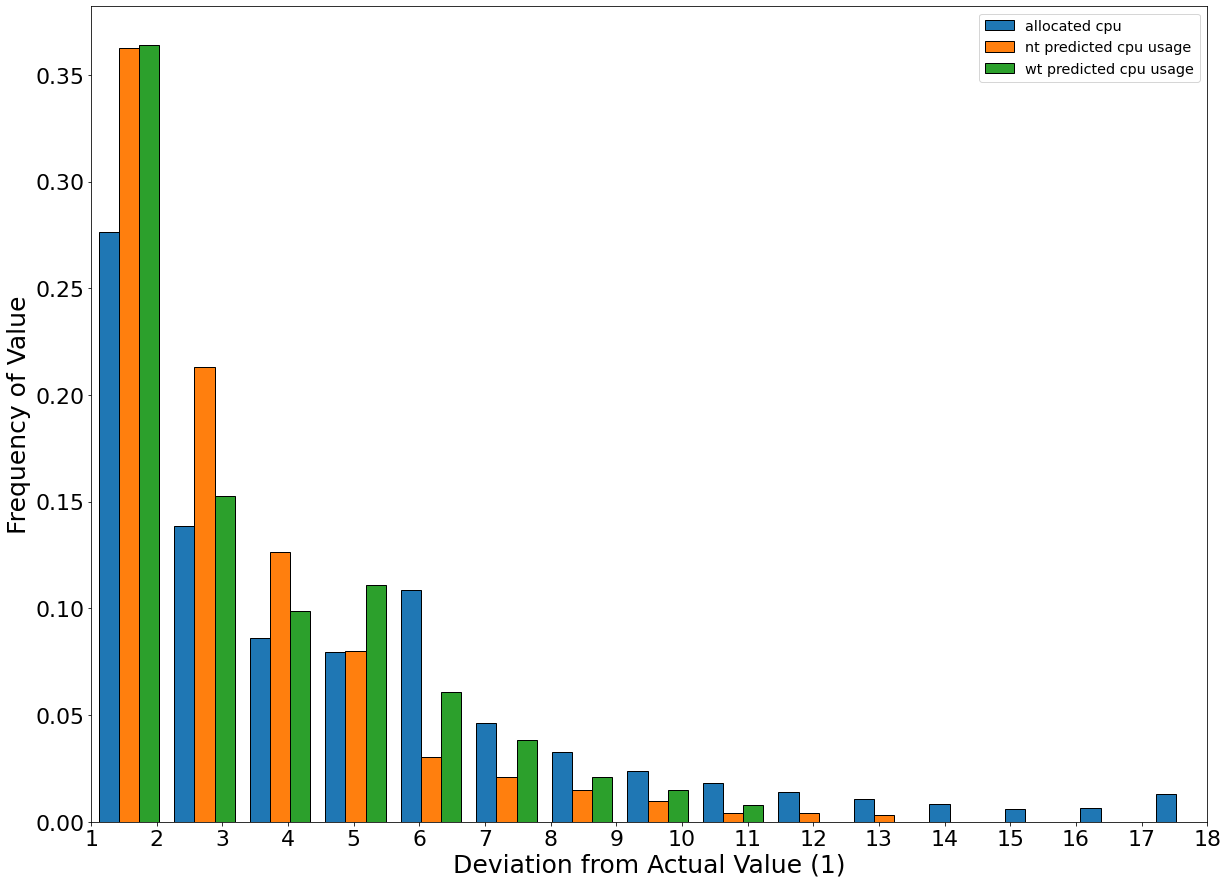

In [29]:
plot_dataframe_histogram(get_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95), save_path='df_over_alloc_hist.png', bin_size=15, density=True)

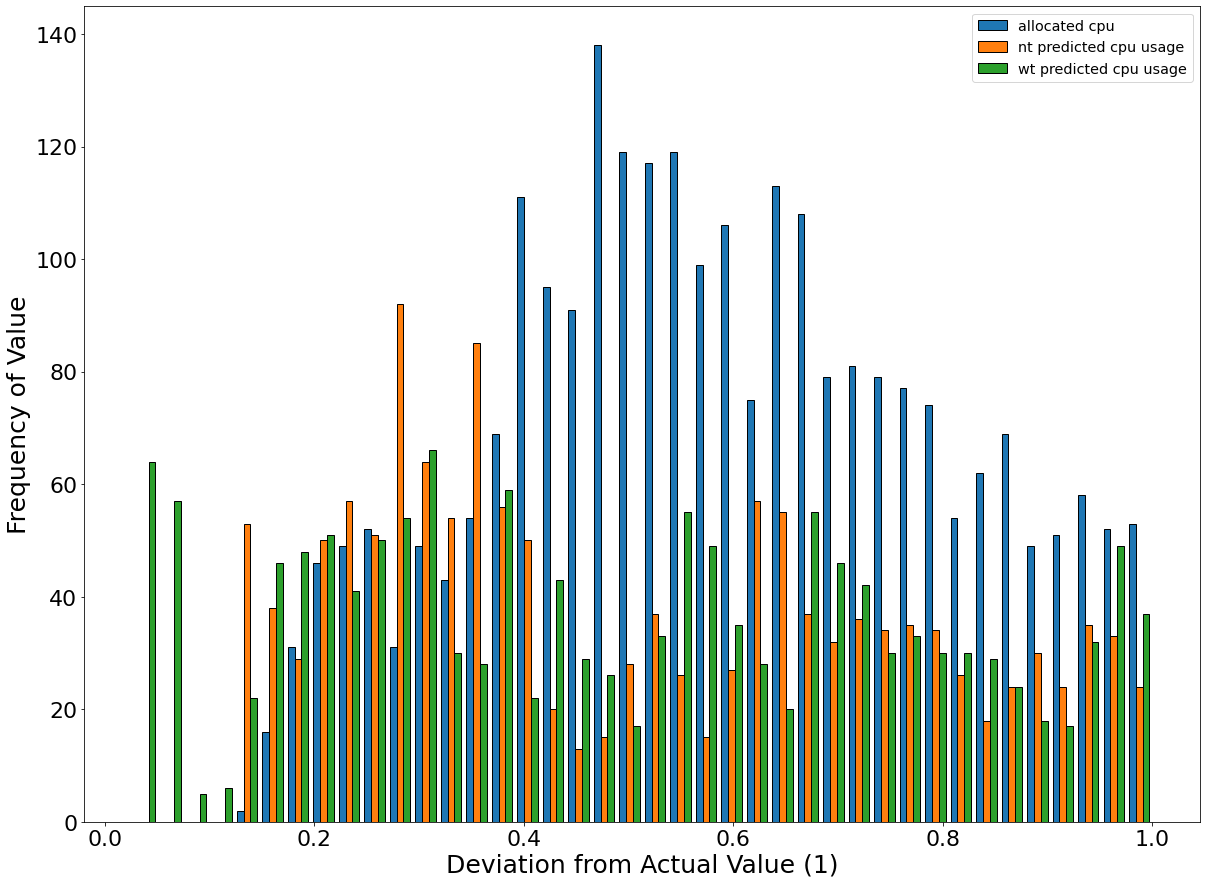

In [30]:
plot_dataframe_histogram(get_under_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95), over_allocation=False, save_path='df_under_alloc_hist.png')

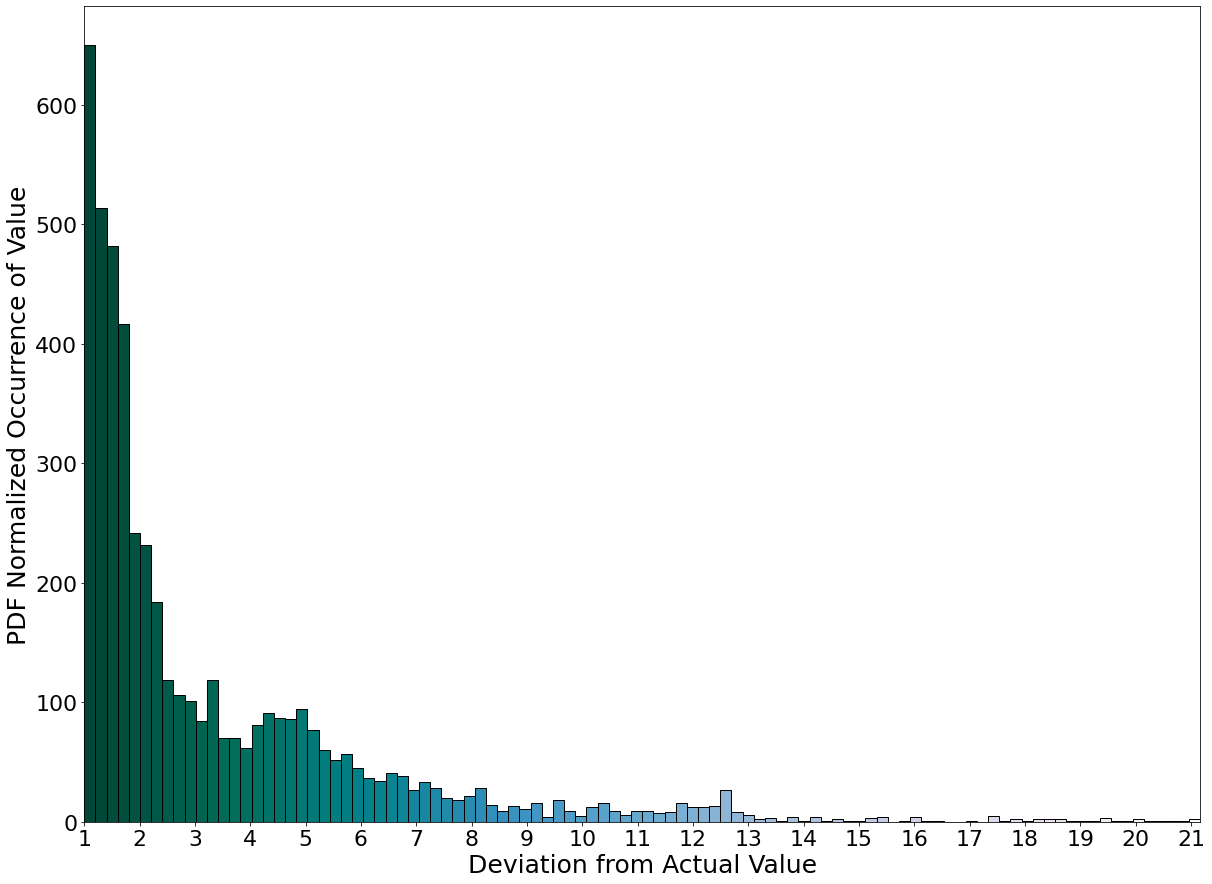

In [31]:
plot_histogram(get_over_allocated_series(norm_df, 2))

In [32]:
wt_over_allocation_series = get_over_allocated_series(norm_df, 2, quantile=0.95)
wt_under_allocation_series = get_under_allocated_series(norm_df, 2, quantile=0.05)
print(wt_over_allocation_series.describe().to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &  wt predicted cpu usage \\
\midrule
count &             4647.000000 \\
mean  &                2.940870 \\
std   &                2.103723 \\
min   &                1.000207 \\
25\%   &                1.402918 \\
50\%   &                2.029432 \\
75\%   &                4.102404 \\
max   &               10.755826 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_69617/488346146.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wt_over_allocation_series.describe().to_latex(index=True))


In [33]:
print(wt_under_allocation_series.describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &  wt predicted cpu usage \\
\midrule
count &             4852.000000 \\
mean  &                0.351319 \\
std   &                0.289291 \\
min   &                0.026105 \\
25\%   &                0.100839 \\
50\%   &                0.246203 \\
75\%   &                0.569191 \\
max   &                0.999845 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_69617/3440907117.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(wt_under_allocation_series.describe().to_latex())


In [34]:
asdf = pd.DataFrame()
asdf['wt'] = wt_over_allocation_series
asdf['nt'] = get_over_allocated_series(norm_df, 1, 0.95)
asdf.head()

,wt,nt
16,4.470211,2.030035
35,3.981402,3.265636
36,3.807077,3.122650
37,3.624221,2.972668
38,3.781261,3.101475


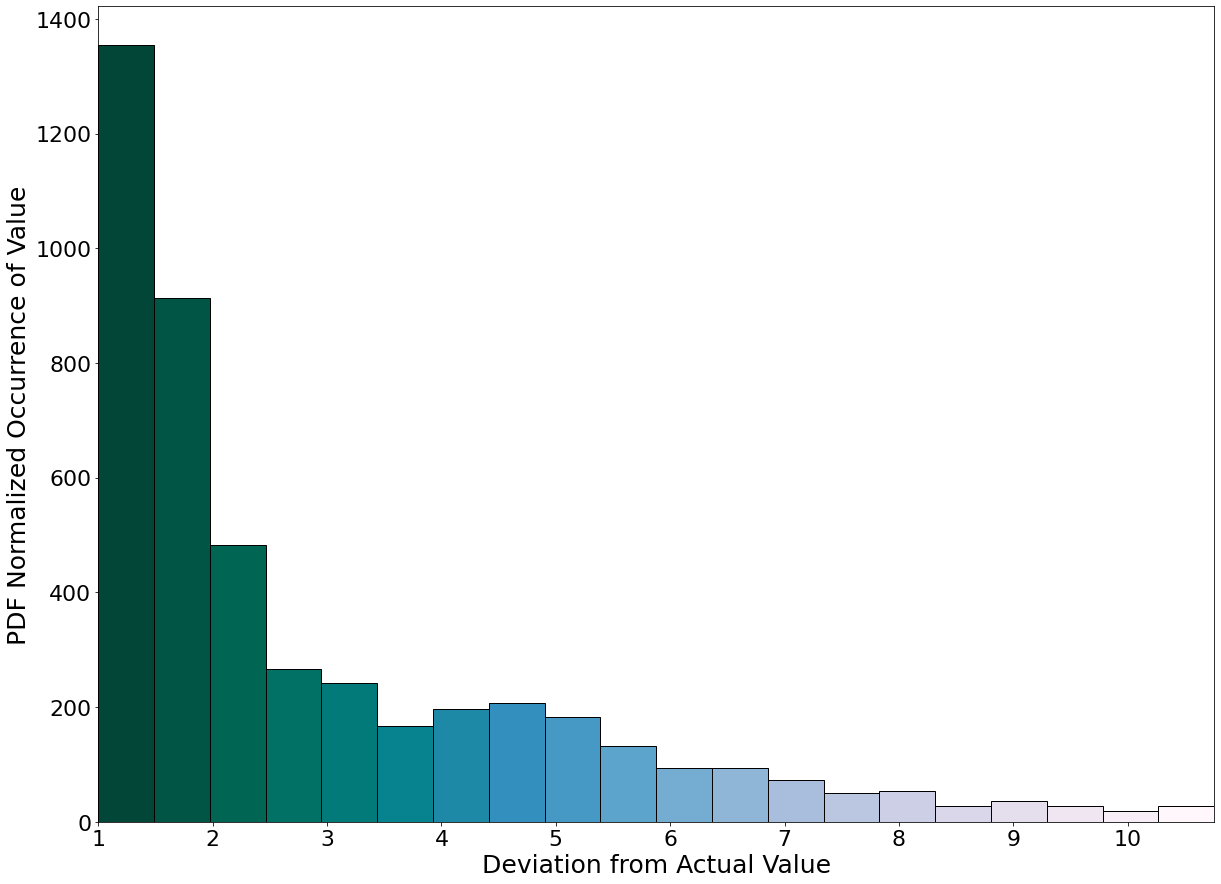

In [35]:

plot_histogram(wt_over_allocation_series, bin_size=20, save_path='wt_over_allocation.png')

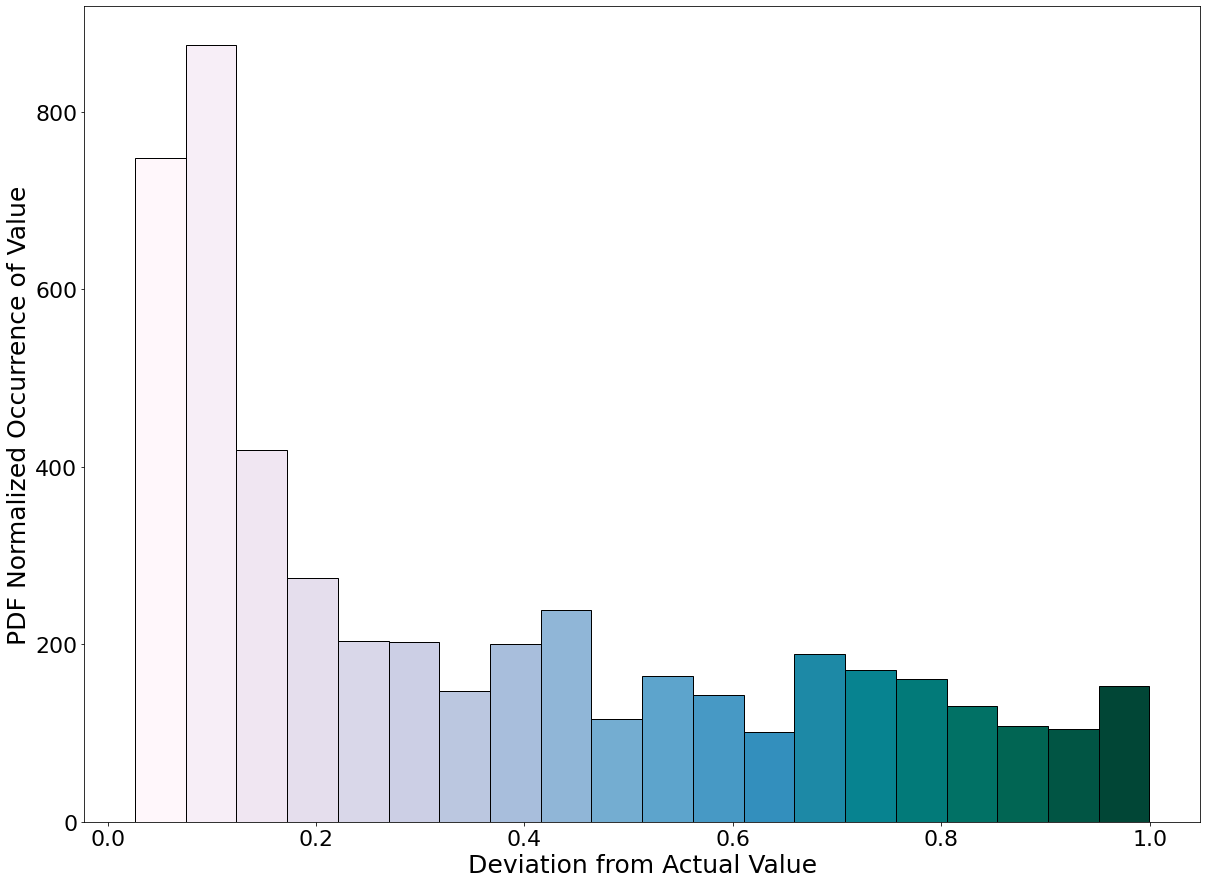

In [36]:
plot_histogram(wt_under_allocation_series, 20, over_allocation=False, save_path='wt_under_allocation.png')

In [37]:
print(describe_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95).to_latex())
# describe_over_allocated_dataframe(norm_df, [0, 1, 2]).loc[asdf].plot.line(figsize=(20, 15))
# describe_over_allocated_dataframe(norm_df, [0, 1, 2]).plot.line(figsize=(20, 15))

\begin{tabular}{lrrr}
\toprule
{} &  allocated cpu &  nt predicted cpu usage &  wt predicted cpu usage \\
\midrule
count &    6928.000000 &             6196.000000 &             4647.000000 \\
mean  &       4.716589 &                3.117077 &                2.940870 \\
std   &       3.679460 &                2.241624 &                2.103723 \\
min   &       1.000012 &                1.000232 &                1.000207 \\
25\%   &       1.903068 &                1.549565 &                1.402918 \\
50\%   &       3.510183 &                2.374176 &                2.029432 \\
75\%   &       6.204604 &                3.824869 &                4.102404 \\
max   &      18.255046 &               12.907610 &               10.755826 \\
\bottomrule
\end{tabular}



/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_69617/511853515.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(describe_over_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.95).to_latex())


In [38]:
describe_under_allocated_dataframe(norm_df, [0, 1, 2], quantile=0.05)

,allocated cpu,nt predicted cpu usage,wt predicted cpu usage
count,136.000000,174.000000,256.000000
mean,0.969178,0.991962,0.956370
std,0.017522,0.003850,0.026048
min,0.939333,0.985438,0.905949
25%,0.952274,0.988892,0.935053
50%,0.970966,0.991515,0.959560
75%,0.985412,0.994892,0.978474
max,0.999634,0.999922,0.999845


# Description

* What you see (in graph and other)
* How much we defer from real value
* And why we see the difference, and explain because of data, algorithm etc...

In [39]:
get_over_allocation_percentage(norm_df, 0)

72.2

In [40]:
get_under_allocation_percentage(norm_df, 0)

27.8

data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [41]:
def get_allocation_distribution_df(df: pd.DataFrame, columns: List[int] = None):
    if columns is None:
        columns = range(len(df.columns))

        
    percentage_list: list = []
    for col in columns:
        percentage_list.append((get_over_allocation_percentage(df, col), get_under_allocation_percentage(df, col)))
        
    
    return pd.DataFrame(percentage_list, index=df.columns, columns=['over-allocated', 'under-allocated'])
            
alloc_df = get_allocation_distribution_df(norm_df)


In [42]:
def plot_stacked_grouped(subplot, shift, width, bot1, bot2):
    x = np.arange(len(baltics))
    plt.subplot(1,2,subplot)
    plt.bar(x-shift, beer, width,
            label='beer', color='gold')
    plt.bar(x, spirit, width, bottom=bot1,
            label='spirit', color='aqua')
    plt.bar(x+shift, wine, width, bottom=bot2,
            label='wine', color='tab:red')
    plt.title('Drink consumption \\nin Baltic countries',
              fontsize=35)
    plt.xlabel(None)
    plt.xticks(baltics.index, labels, fontsize=25)
    plt.ylabel('Servings per person', fontsize=27)
    plt.yticks(fontsize=20)
    sns.despine(bottom=True)
    plt.tick_params(bottom=False, left=True)
    plt.legend(frameon=False, fontsize=17)
    return None

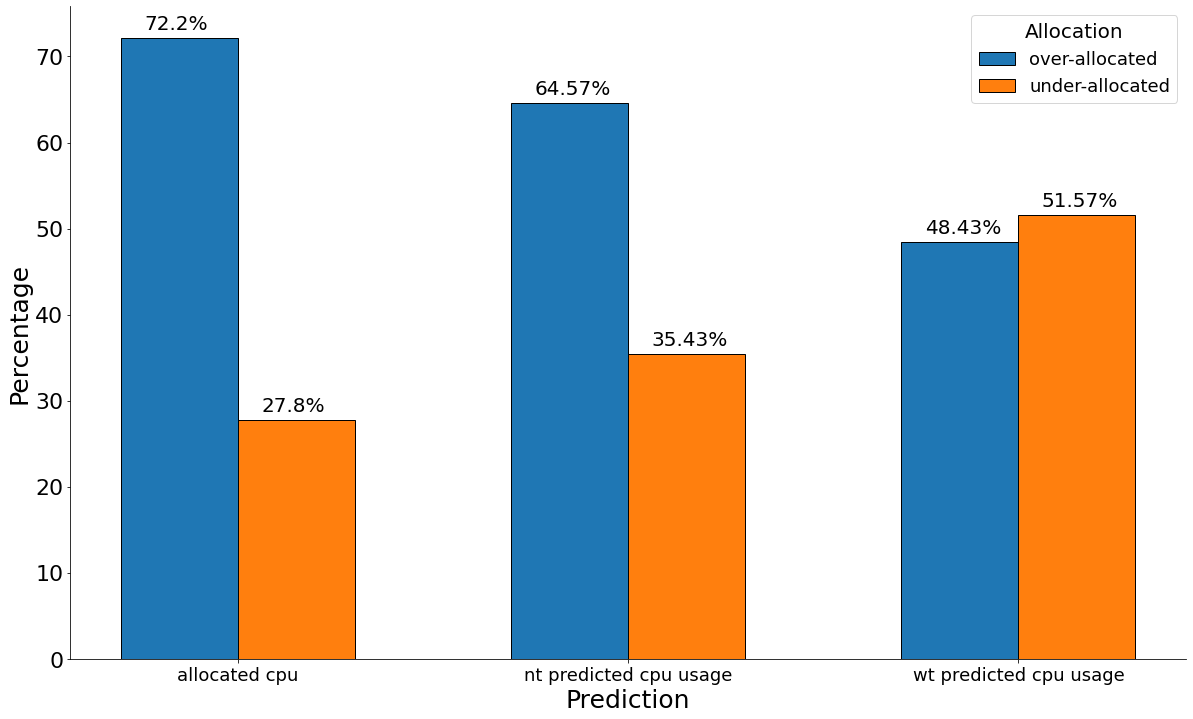

In [43]:
# Generating labels and index
label = alloc_df.index
x = np.arange(len(label))

#create the base axis
fig, ax = plt.subplots(figsize = (20,12))#set the width of the bars
width = 0.3 # add first pair of bars
rect1 = ax.bar(x - width / 2,
              alloc_df['over-allocated'],
              width = width, 
               label = "No",
               edgecolor = "black") # add second pair of bars 
rect2 = ax.bar(x + width / 2,
              alloc_df['under-allocated'],
              width = width,
              label = "Yes",
              edgecolor = "black")

# Reset x-ticks
ax.set_xticks(x)
# Setting x-axis tick labels
ax.set_xticklabels(label)

# Adding bar values
for p in ax.patches:
    t = ax.annotate(str(p.get_height()) + "%", xy = (p.get_x() + 0.06, p.get_height() + 1))
    t.set(color = "black", size = 20)
    
# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)# Adding axes and tick labels
ax.tick_params(axis = "x", labelsize = 18, labelrotation = 0)
ax.set_ylabel("Percentage", size = 25)
ax.set_xlabel("Prediction", size = 25)

# Customize legend
ax.legend(labels = alloc_df.columns,
          fontsize = 18,
          title = "Allocation",
          title_fontsize = 20)# # Fix legend position
ax.legend_.set_bbox_to_anchor([1, 1])


In [44]:
get_over_allocation_percentage(norm_df, 2)

48.43

In [45]:
get_under_allocation_percentage(norm_df, 2)

51.57